# Global Trend Analysis

Last Updated: 2/1/2024

---

In [4]:
# import data manipulation libraries
import pandas as pd

# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
# import the data
df = pd.read_csv("Video Games Sales Cleaned.csv")
df['Year'] = df['Year'].astype(int)
df.head()

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [41]:
def to_global(df):
    groupby = df.groupby(["Year"])
    num_games = groupby['Game Title'].count()
    total_sales = groupby['Global'].sum()
    average_sales = groupby['Global'].mean()
    std_sales = groupby['Global'].std()
    max_sales = groupby['Global'].max()
    df_global = pd.DataFrame({'Number of Games': num_games, 'Total Sales': total_sales, 'Average Sales': average_sales, "Standard Deviation in Sales": std_sales, 'Max Sales': max_sales})
    df_global = df_global.reset_index()
    return df_global

df_global = to_global(df)
df_global.head()

,Year,Number of Games,Total Sales,Average Sales,Standard Deviation in Sales,Max Sales
0,1983,6,10.96,1.826667,0.862176,3.20
1,1984,9,45.66,5.073333,8.789703,28.31
2,1985,6,49.57,8.261667,15.690209,40.24
3,1986,12,27.17,2.264167,1.490207,6.51
4,1987,7,17.06,2.437143,1.073603,4.38


The graph below shows the number of games within our dataset over the years. As the dataset does not contain every game made in every year, the sample size for each year is critical to understand. Looking at beyond 2010, the number of games per year drops drastically and which could increase the volitility of the trend in that era. Similarly, the period before 1995 also had very few games per year.

<Axes: xlabel='Year', ylabel='Number of Games'>

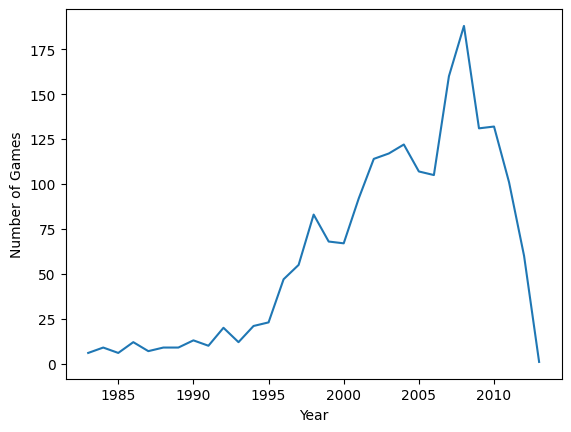

In [18]:
sb.lineplot(df_global, x='Year', y='Number of Games')

The shape of the total game sales per year graph is roughly the same the shape of the number of games per year graph. This is indicative of a stable average sales over the years.

The only notable difference is 2009 and 2010 - directly after the 2008 Financial Crisis. The number of games that came out in those years were significantly less than the previous years but the total sales were comparable. Based on this, it appears that the global gaming industry is resilient against recessions. 

<Axes: xlabel='Year', ylabel='Total Sales'>

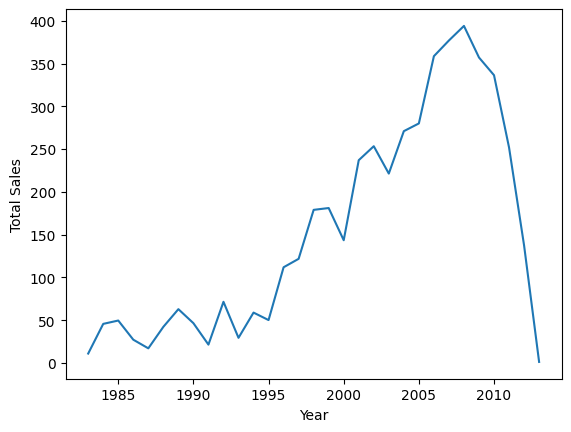

In [19]:
sb.lineplot(df_global, x='Year', y='Total Sales')

Unexpectedly, there appears to be spikes in the average sales in the years 1985, 1989, and 2006. Investigating these years reveals that there were hit games produced during that period. In 1985, it was Super Mario Bros. In 1989, it was tetris and Super Mario Land. Lastly, in 2006, it was Wii Sports. There were other hits games produced similar to the likes of tetris as well. However, they were produced in years with significantly more games and their impact on the average sales was minimized. 

Removing these games from the dataset reveals that the average sales for a game is trending downwards. This makes sense as the number of games produced yearly is trending upwards. As such, the compeition for the customers is increasing. 

<Axes: xlabel='Year', ylabel='Average Sales'>

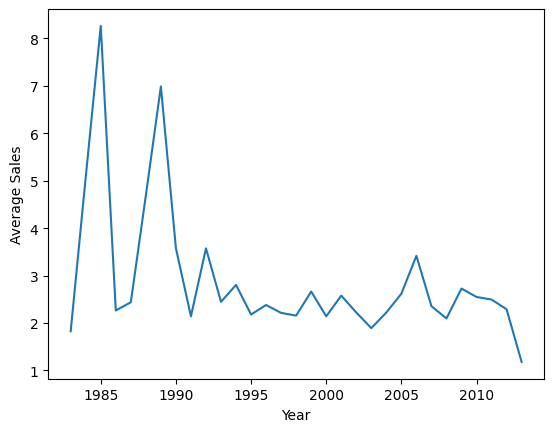

In [20]:
sb.lineplot(df_global, x='Year', y='Average Sales')

In [34]:
# Investigate popular games
df.loc[df['Global'] > 30]

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


<Axes: xlabel='Year', ylabel='Average Sales'>

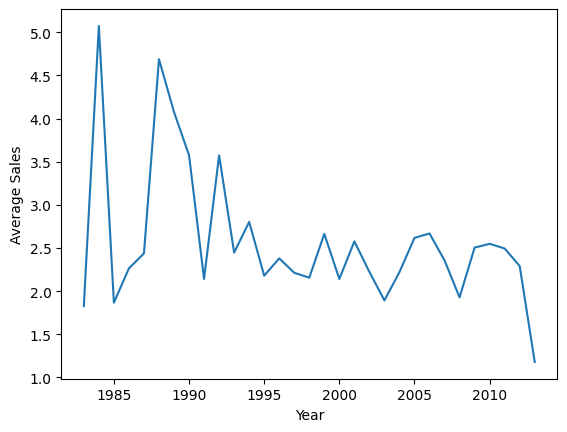

In [43]:
df_global_without_outliers = to_global(df.loc[df['Global'] <= 30])
sb.lineplot(df_global_without_outliers, x='Year', y='Average Sales')

Excluding the spikes in variation in 1985, 1989 and 2006, the standard deviation in game sales seems to be trending up. This could be due to the falling average sales or due to customers gravitating towards popular games. From the average sales graph, we already know that the averages sales are falling. However, looking at the most popular games for each year without considering the hit games, it appears to be a combination of both factors. 

This is a source of concern as it means that games sales are volatile. If a game is successful, it can be wildly successful, garnering a large number of sales. However, if it average, it could drowned in the sea of average games.

<Axes: xlabel='Year', ylabel='Standard Deviation in Sales'>

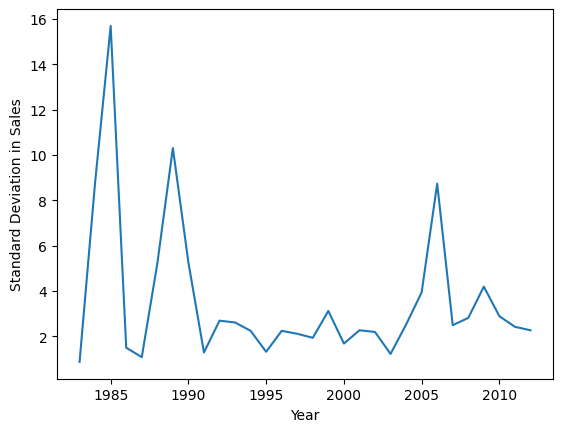

In [40]:
sb.lineplot(df_global, x='Year', y='Standard Deviation in Sales')

<Axes: xlabel='Year', ylabel='Max Sales'>

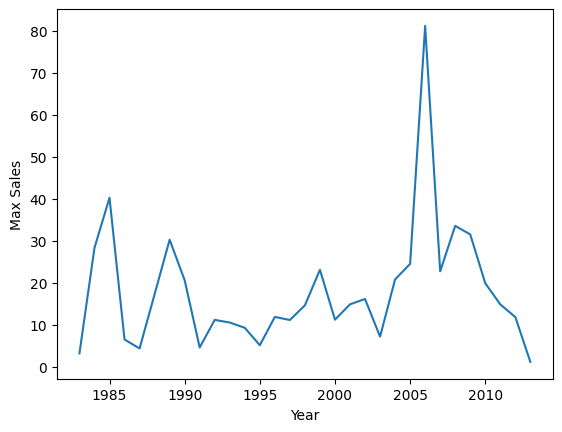

In [45]:
sb.lineplot(df_global, x='Year', y='Max Sales')